In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [90]:
data = pd.read_csv('housing.csv')

In [91]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18169,-122.02,37.36,21.0,2471.0,677.0,1486.0,689.0,3.9038,243800.0,<1H OCEAN
14996,-117.04,32.73,25.0,1375.0,267.0,1032.0,278.0,3.5492,125400.0,NEAR OCEAN
16074,-122.49,37.74,52.0,2189.0,433.0,1147.0,420.0,3.4583,321300.0,NEAR OCEAN
11874,-117.37,34.00,41.0,1248.0,278.0,770.0,250.0,3.0250,90600.0,INLAND
11379,-117.95,33.68,26.0,2249.0,344.0,1311.0,373.0,5.0287,265000.0,<1H OCEAN
20260,-119.18,34.21,30.0,1096.0,231.0,741.0,229.0,3.8625,234700.0,NEAR OCEAN
10792,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN
1904,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
15644,-122.42,37.79,52.0,3457.0,1021.0,2286.0,994.0,2.5650,225000.0,NEAR BAY
2719,-115.48,32.80,21.0,1260.0,246.0,805.0,239.0,2.6172,88500.0,INLAND


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [93]:
data.dropna(inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [95]:
from sklearn.model_selection import train_test_split as tts 

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [96]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2, random_state=42)

In [97]:
train_data = X_train.join(y_train)

In [98]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

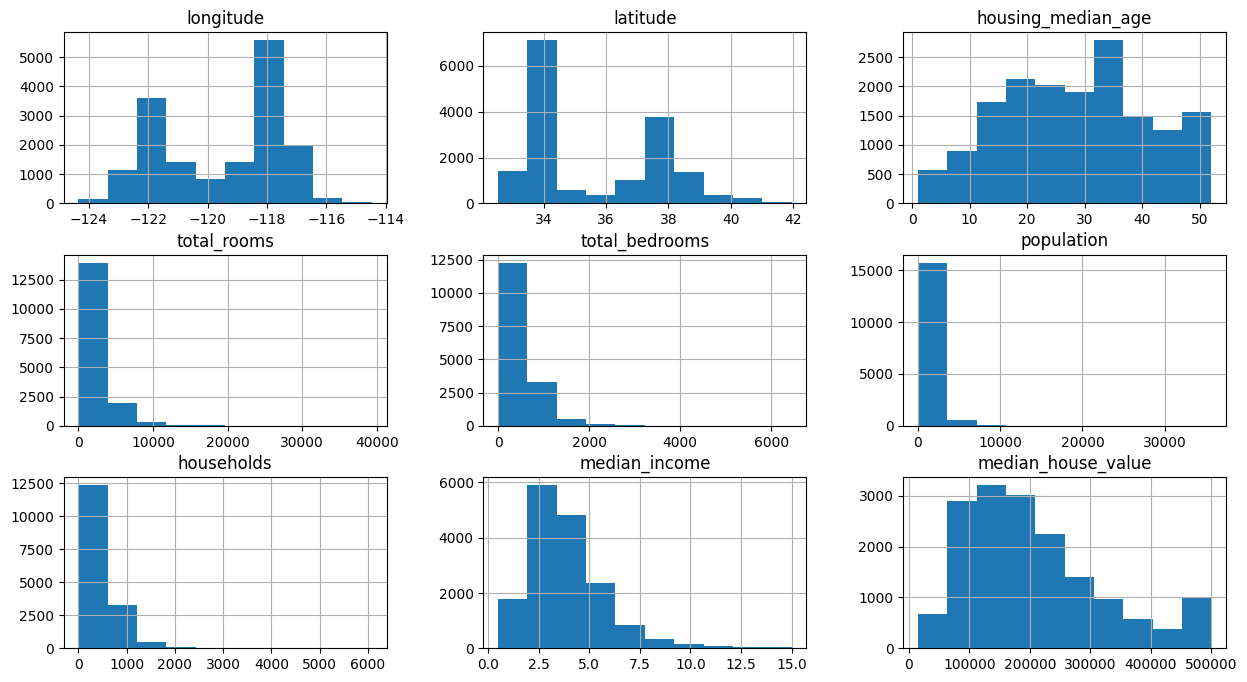

In [99]:
train_data.hist(figsize=(15,8))

In [100]:
train_data.drop('ocean_proximity', axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


<Axes: >

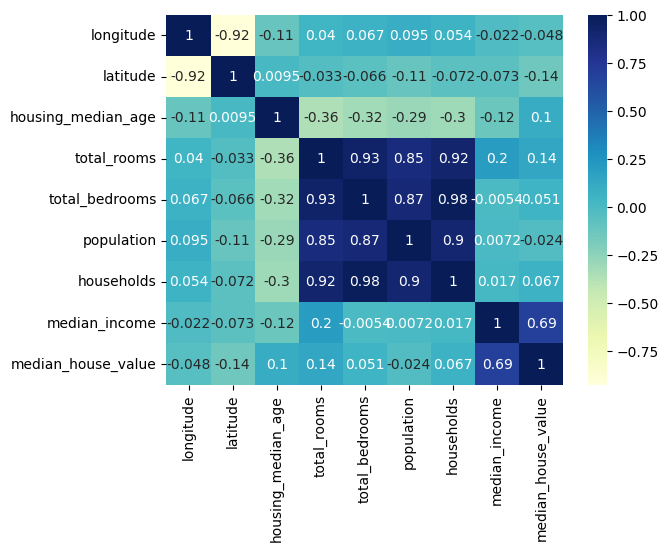

In [101]:
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu')

In [102]:
# Preprocessing Part 2 trying to convert the data into a normal distribbution
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

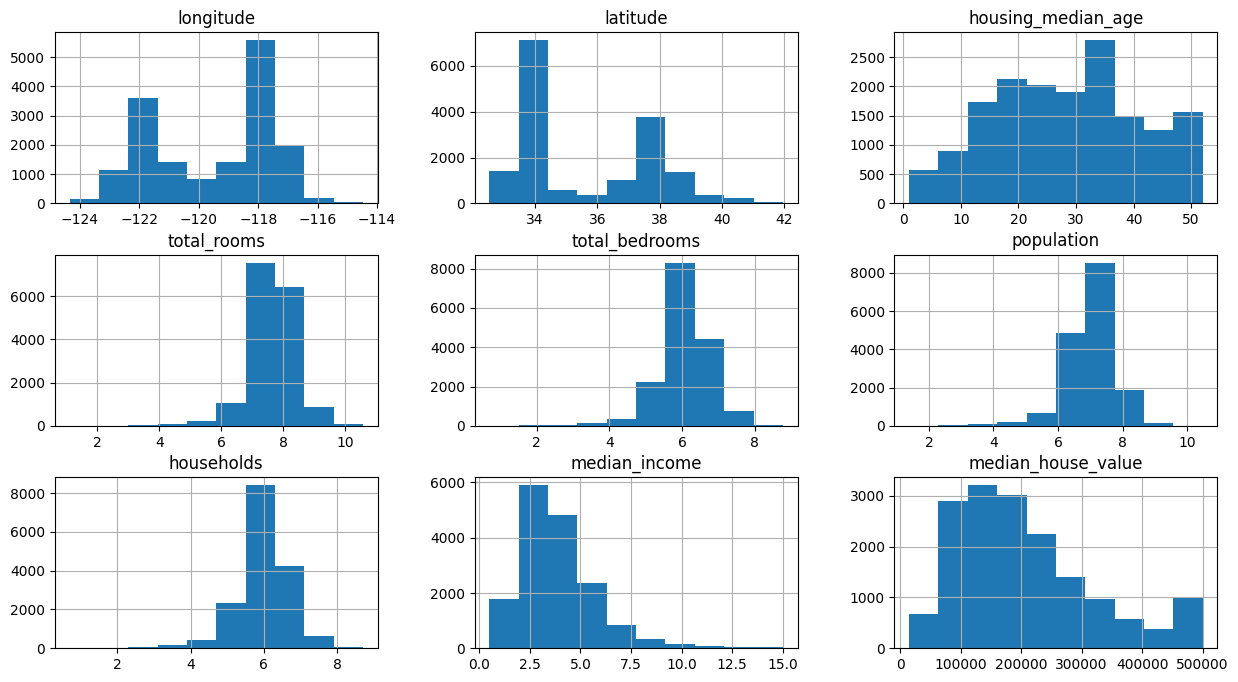

In [103]:
train_data.hist(figsize=(15,8))

In [104]:
# Convert ocean_proximity to OneHotEncoding
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [105]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], dtype=int)).drop('ocean_proximity', axis=1)

In [106]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

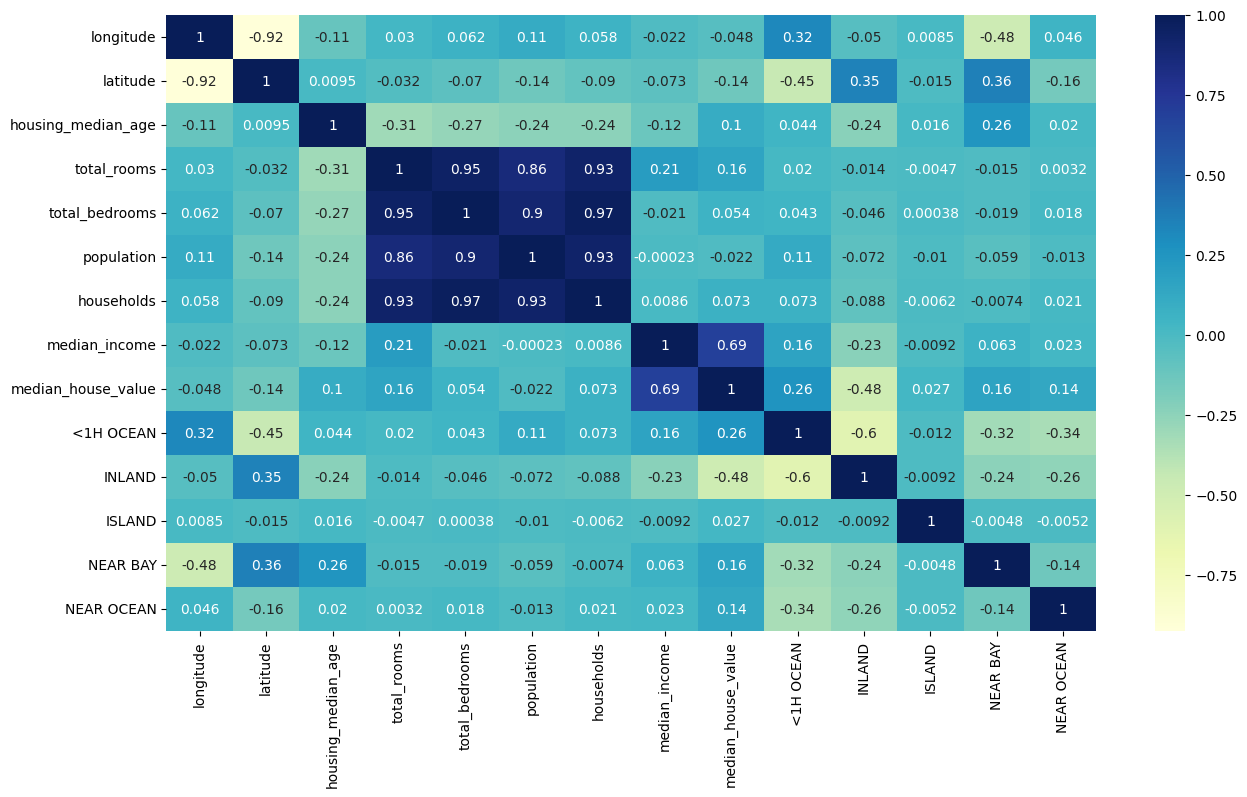

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

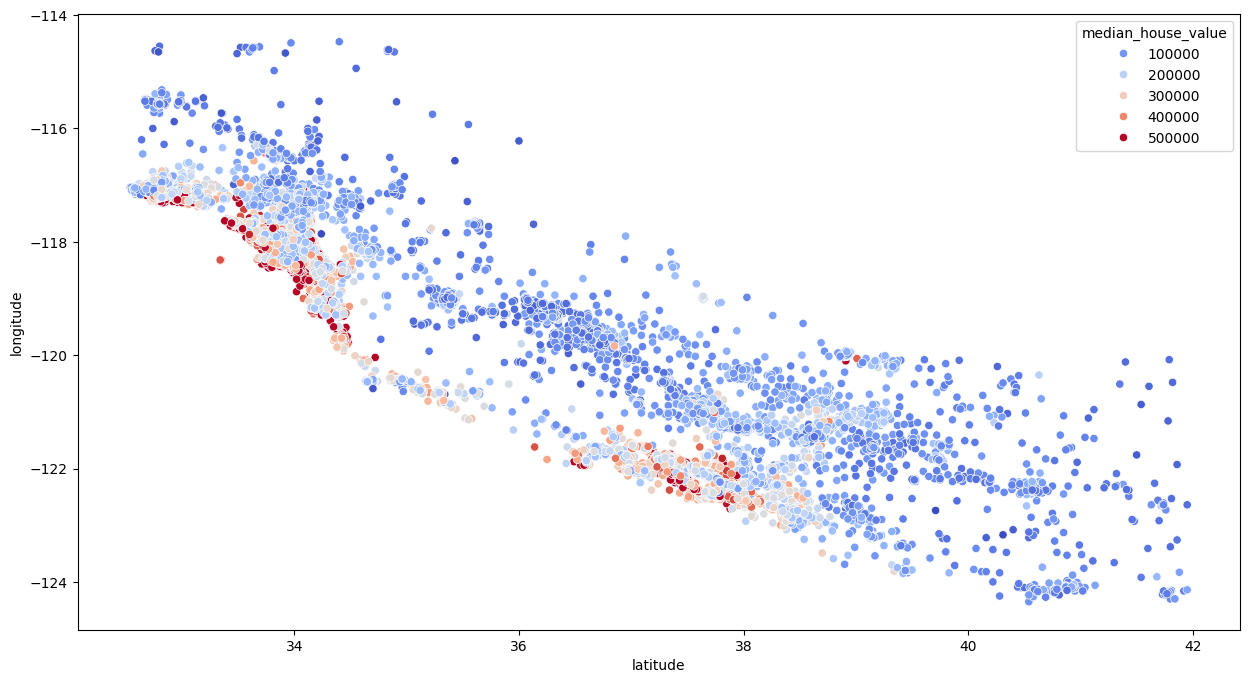

In [108]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data,hue='median_house_value', palette='coolwarm')


In [109]:
# Feature Engineering
# we have no. of rooms and no. of bedrooms so we can merge both into 1 feature i.e no. of bedroom per room

In [110]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']

In [111]:
train_data['households_ratio'] = train_data['total_rooms']/ train_data['households']

<Axes: >

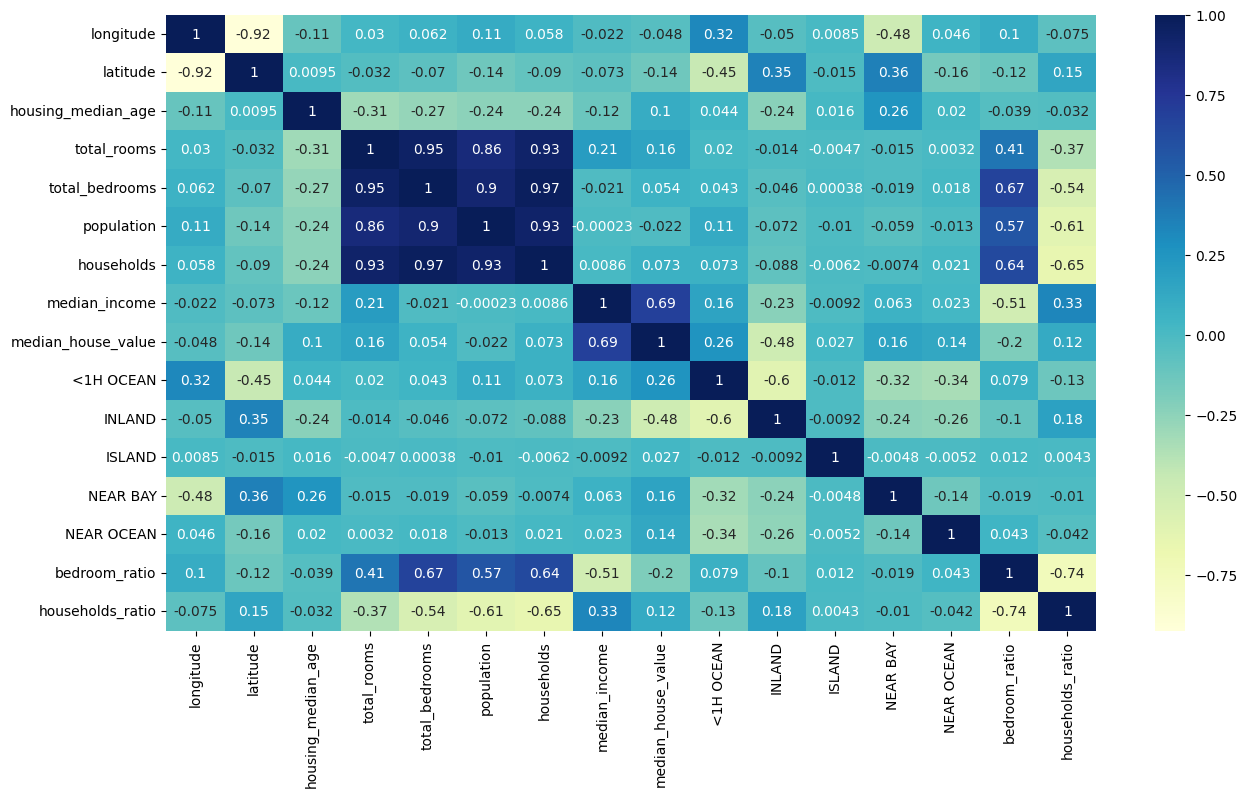

In [112]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [113]:
# Training Linear Regression Model
from sklearn.linear_model import LinearRegression 


In [114]:
X_train,y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

In [115]:
# without scaling
reg = LinearRegression()

reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [116]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)

In [117]:
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['households_ratio'] = test_data['total_rooms']/ test_data['households']

In [118]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,0,0,0,0,1,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,0,1,0,0,0,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,1,0,0,0,0,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,0,0,0,1,0,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,0,1,0,0,0,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,7.978311,6.666957,7.076654,6.620073,3.5985,500001.0,0,0,0,0,1,0.835635,1.205170
6274,-117.95,34.03,33.0,7.486053,5.978886,7.325149,5.932245,3.3389,157900.0,1,0,0,0,0,0.798670,1.261926
2997,-119.03,35.32,12.0,7.909122,6.309918,7.166266,6.261492,2.5575,100200.0,0,1,0,0,0,0.797803,1.263137
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,3.4844,127700.0,0,1,0,0,0,0.780284,1.269433


In [119]:
train_data.shape, test_data.shape

((16346, 16), (4087, 16))

In [120]:
X_test,y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']

In [121]:
reg = LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
reg.score(X_test,y_test)

0.6687407117584973

In [124]:
# Applying RandoomForest 
# Before that we need to scale the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train,X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [126]:
# Applying LinearRegression 
reg = LinearRegression()
reg.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
reg.score(X_test,y_test)

0.6692303774756763

In [128]:
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor()

forest.fit(X_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [129]:
forest.score(X_test,y_test)

0.7683998046841567

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    'n_estimators' : [3,10,30, 50],
    'max_features' : [2,4,6,8],
    'min_samples_split' :     
}

grid_search = GridSearchCV(forest, param_grid,cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

In [131]:
grid_search.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,50


In [132]:
grid_search.best_estimator_

,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [133]:
grid_search.best_estimator_.score(X_test,y_test)

0.7830862348276881

In [141]:

from sklearn.model_selection import GridSearchCV

forest_2 = RandomForestRegressor()
param_grid_1 = {
    'n_estimators' : [30, 50,75,100],
    'max_features' : [8,12,20,24],
    'min_samples_split' : [2,4,6,8]  
}

grid_search_1 = GridSearchCV(forest_2, param_grid,cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

In [142]:
grid_search_1.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [8, 12, ...], 'min_samples_split': [2, 4, ...], 'n_estimators': [30, 50, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,75


In [143]:
grid_search_1.best_estimator_
grid_search_1.best_estimator_.score(X_test,y_test)

0.7725967139745001